# Coal Production in Mines 2013

## Data cleaning

In [1]:
%matplotlib inline

import string

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

sns.set();

In [2]:
df = pd.read_excel('coalpublic2013.xls', header=3)
df = df.drop(['Year'], axis=1)
df = df.set_index('MSHA ID')

In [3]:
df.head()

,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,
103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [4]:
df['Company Type'].unique()

array(['Indepedent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

In [5]:
df['Company Type'].replace(to_replace='Indepedent Producer Operator', 
                            value='Independent Producer Operator', inplace=True)

In [6]:
df['Company Type'].head()

MSHA ID
103381    Independent Producer Operator
103404    Independent Producer Operator
100759    Independent Producer Operator
103246    Independent Producer Operator
103451    Independent Producer Operator
Name: Company Type, dtype: object

In [7]:
df.head()

,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,
103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [8]:
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [9]:
df.head()

,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,
103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
103246,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
103451,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [10]:
len(df)

1450

Text(0, 0.5, 'Total_Hours_Worked')

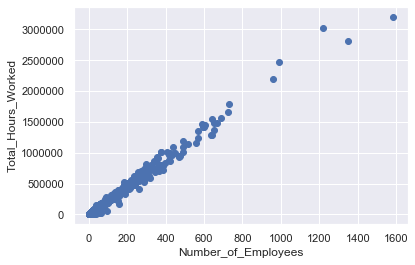

In [11]:
plt.scatter(df.Average_Employees, df.Labor_Hours)
plt.xlabel('Number_of_Employees')
plt.ylabel('Total_Hours_Worked')

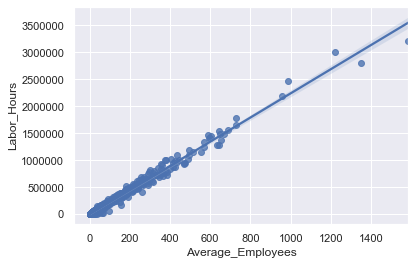

In [12]:
sns.regplot(df.Average_Employees, df.Labor_Hours)

In [13]:
for column in df.columns:
    print(column)

Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours


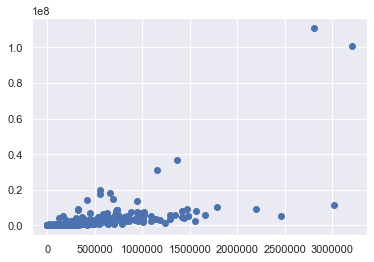

In [14]:
plt.scatter(df.Labor_Hours, df['Production_(short_tons)'])

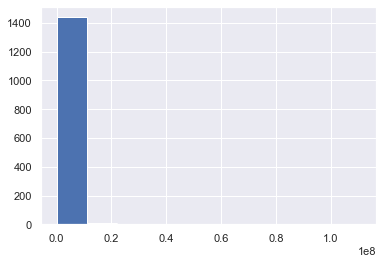

In [15]:
df['Production_(short_tons)'].hist()

In [16]:
# We are removing data here

df = df[df['Production_(short_tons)'] > 0]

In [17]:
len(df)

1061

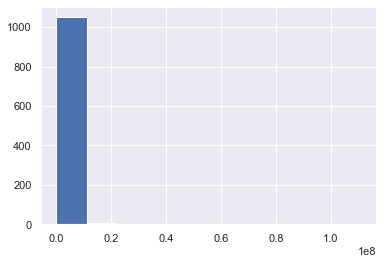

In [18]:
df['Production_(short_tons)'].hist()

In [19]:
df['log_production'] = np.log(df['Production_(short_tons)'])

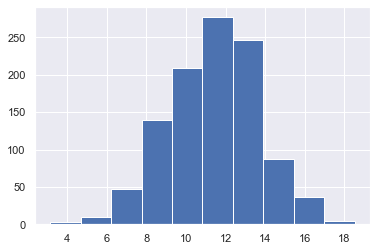

In [20]:
df.log_production.hist()

In [21]:
df.to_csv('../cleaned_coalpublic2013.csv')

## Make a prediction about coal production

In [22]:
df.head()

,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours,log_production
MSHA ID,,,,,,,,,,,,,,,
103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,10.933178
103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,10.268374
100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,14.180234
103246,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,11.380388
103451,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,11.901577


In [23]:
len(df)

1061

In [24]:
df.Mine_Status.unique()

array(['Active, men working, not producing', 'Permanently abandoned',
       'Active', 'Temporarily closed', 'New, under construction'],
      dtype=object)

In [25]:
df[['Mine_Status', 'Production_(short_tons)']].groupby('Mine_Status').mean()

,Production_(short_tons)
Mine_Status,
Active,1.283471e+06
"Active, men working, not producing",1.259756e+05
"New, under construction",5.200000e+01
Permanently abandoned,6.050497e+04
Temporarily closed,2.966640e+04


In [26]:
df[['Mine_Status', 'log_production']].groupby('Mine_Status').mean()

,log_production
Mine_Status,
Active,11.977453
"Active, men working, not producing",10.499962
"New, under construction",3.951244
Permanently abandoned,9.896046
Temporarily closed,9.162933


In [27]:
df.Union_Code.unique()

array([' ', 'UNIT', 'United Mine Workers of America', 'INTE',
       'International Union of Operation Engineers',
       'Scotia Employees Association', 'Western Energy Workers'],
      dtype=object)

In [28]:
features = ['Average_Employees',
            'Labor_Hours'
           ]


categoricals = ['Mine_State',
                'Mine_County',
                'Mine_Status',
                'Mine_Type',
                'Company_Type',
                'Operation_Type',
                'Union_Code',
                'Coal_Supply_Region',
           ]

target = 'log_production'

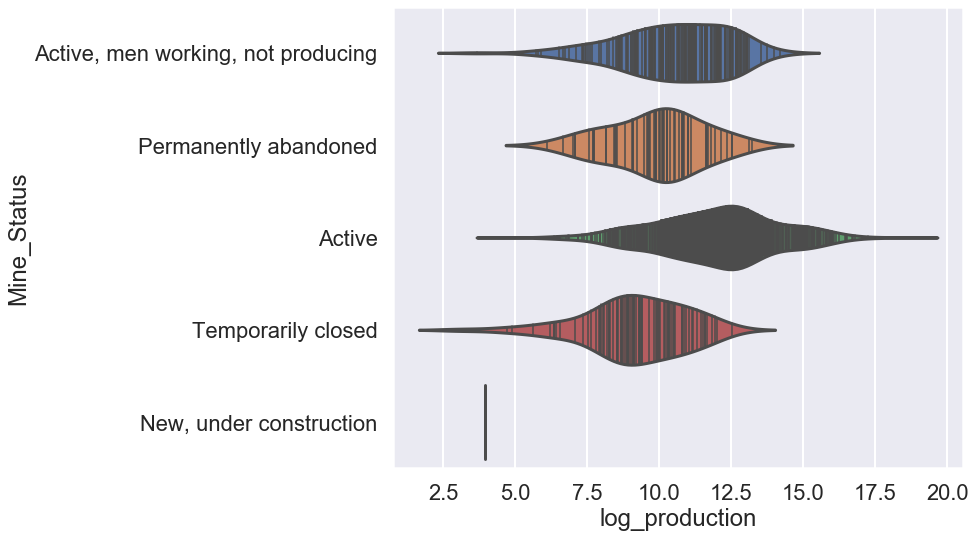

In [29]:
sns.set_context('poster')
fig = plt.subplots(figsize=(14,8))
sns.violinplot(y='Mine_Status', x='log_production', data=df,
              split=True, inner='stick')
plt.tight_layout()

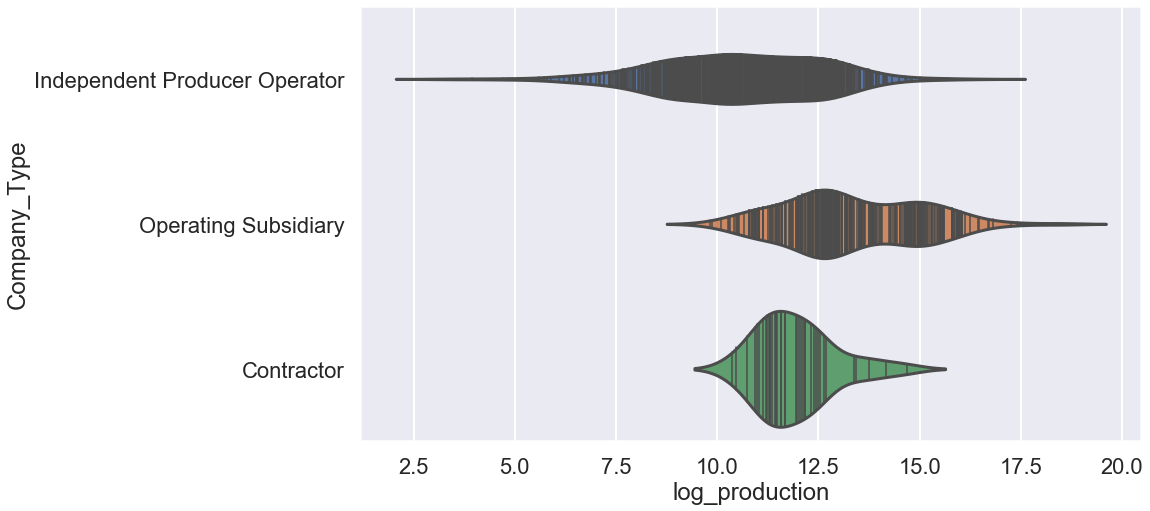

In [30]:
sns.set_context('poster')
fig = plt.subplots(figsize=(14,8))
sns.violinplot(y='Company_Type', x='log_production', data=df,
              split=True, inner='stick')

In [31]:
df['Company_Type'].unique()

array(['Independent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

In [32]:
pd.get_dummies(df['Company_Type']).sample(50).head()

,Contractor,Independent Producer Operator,Operating Subsidiary
MSHA ID,,,
1512908,0,1,0
1518889,0,0,1
1519552,0,1,0
4607178,0,0,1
1202418,0,1,0


In [33]:
pd.get_dummies(df[categoricals]).head()

,Mine_State_Alabama,Mine_State_Alaska,Mine_State_Arizona,Mine_State_Arkansas,Mine_State_Colorado,Mine_State_Illinois,Mine_State_Indiana,Mine_State_Kansas,Mine_State_Kentucky (East),Mine_State_Kentucky (West),...,Union_Code_United Mine Workers of America,Union_Code_Western Energy Workers,Coal_Supply_Region_Appalachia Central,Coal_Supply_Region_Appalachia Northern,Coal_Supply_Region_Appalachia Southern,Coal_Supply_Region_Illinois Basin,Coal_Supply_Region_Interior,Coal_Supply_Region_Powder River Basin,Coal_Supply_Region_Uinta Region,Coal_Supply_Region_Western
MSHA ID,,,,,,,,,,,,,,,,,,,,,
103381,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
103404,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
100759,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
103246,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
103451,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
dummy_categoricals = []

for categorical in categoricals:
    length = len(df[categorical].unique())
    print(categorical, length)
    # print(categorical)
    drop_var = sorted(df[categorical].unique())[-1]
    temp_df = pd.get_dummies(df[categorical], prefix=categorical)
    df = pd.concat([df, temp_df], axis=1)
    temp_df.drop('_'.join([categorical, str(drop_var)]), axis=1, inplace=True)
    dummy_categoricals += temp_df.columns.tolist()

Mine_State 29
Mine_County 164
Mine_Status 5
Mine_Type 3
Company_Type 3
Operation_Type 2
Union_Code 7
Coal_Supply_Region 8


In [35]:
dummy_categoricals[:10]

['Mine_State_Alabama',
 'Mine_State_Alaska',
 'Mine_State_Arizona',
 'Mine_State_Arkansas',
 'Mine_State_Colorado',
 'Mine_State_Illinois',
 'Mine_State_Indiana',
 'Mine_State_Kansas',
 'Mine_State_Kentucky (East)',
 'Mine_State_Kentucky (West)']

## Build our Model (Random Forest Regressor)

In [36]:
len(dummy_categoricals)

213

In [37]:
train, test = train_test_split(df, test_size=0.3)

In [38]:
train.head()

,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,...,Union_Code_United Mine Workers of America,Union_Code_Western Energy Workers,Coal_Supply_Region_Appalachia Central,Coal_Supply_Region_Appalachia Northern,Coal_Supply_Region_Appalachia Southern,Coal_Supply_Region_Illinois Basin,Coal_Supply_Region_Interior,Coal_Supply_Region_Powder River Basin,Coal_Supply_Region_Uinta Region,Coal_Supply_Region_Western
MSHA ID,,,,,,,,,,,,,,,,,,,,,
103372,Cane Creek Mine,Alabama,Walker,Active,Surface,Independent Producer Operator,Mine only,Cane Creek Llc,"P.O. Box 1253, Cullman, AL 35056",,...,0,0,0,0,1,0,0,0,0,0
4406444,Laurel Mountain,Virginia,Russell,"Active, men working, not producing",Underground,Operating Subsidiary,Mine only,Dickenson-Russell Coal Company,"7546 Gravel Lick Road, Cleveland, VA 24225",United Mine Workers of America,...,1,0,1,0,0,0,0,0,0,0
4407275,#2,Virginia,Wise,"Active, men working, not producing",Underground,Independent Producer Operator,Mine only,Professional Miners Llc,"P.O. Box 728, Blountville, TN 37617",,...,0,0,1,0,0,0,0,0,0,0
1519659,Redbush #1,Kentucky (East),Johnson,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Red Bush, Llc","717 Red Bud Place, Corbin, KY 40701",,...,0,0,1,0,0,0,0,0,0,0
4609345,Remining #3,West Virginia (Southern),Mingo,Active,Surface,Independent Producer Operator,Mine only,Cam Mining Llc,"P.O. Box 1169, Pikeville, KY 41502",,...,0,0,1,0,0,0,0,0,0,0


In [39]:
rf = RandomForestRegressor(n_estimators=1000, oob_score=True)

rf.fit(train[features + dummy_categoricals], train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

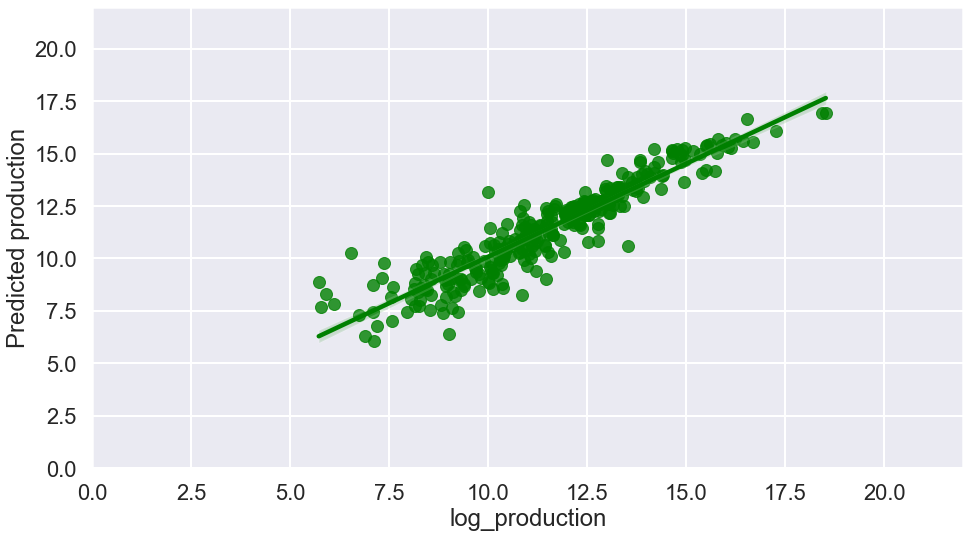

In [40]:
fig = plt.subplots(figsize=(14,8))
sns.regplot(test[target], rf.predict(test[features + dummy_categoricals]), color='green')
plt.ylabel('Predicted production')
plt.xlim(0, 22)
plt.ylim(0, 22)
plt.tight_layout()

In [41]:
predicted = rf.predict(test[features + dummy_categoricals])
r2 = r2_score(test[target], predicted)
explained_vari = explained_variance_score(test[target], predicted)
mean_sq_err = mean_squared_error(test[target], predicted)

In [42]:
print('R^2 score:', r2)
print('Explained variance:', explained_vari)
print('MSE:', mean_sq_err)

R^2 score: 0.8674191627225897
Explained variance: 0.8686951756331265
MSE: 0.7164871098397734


In [43]:
rf_importances = pd.DataFrame({'name': train[features + dummy_categoricals].columns,
                               'importance': rf.feature_importances_
                              }).sort_values(by='importance',
                                            ascending=False).reset_index(drop=True)

In [44]:
rf_importances.head(5)

,name,importance
0,Labor_Hours,0.870098
1,Average_Employees,0.037606
2,Mine_Type_Surface,0.005479
3,Coal_Supply_Region_Appalachia Central,0.005067
4,Mine_Status_Active,0.004788
